# Работа 3.3.5 (Эффект Холла в металлах)

### Библиотеки

In [49]:
import numpy as np
import matplotlib.pyplot as plt

### Функции

#### МНК

In [50]:
def MNK(xs, ys):
    mx = np.mean(xs) #Среднее
    my = np.mean(ys)
    mx2 = np.mean(xs**2) #Средний квадрат
    my2 = np.mean(ys**2)
    mxy = np.mean(xs * ys) #Среднее от произведения

    k = (mxy - mx*my)/(mx2 - mx**2) 
    b = my - k*mx

    n = len(xs)
    sigma_k = (1/np.sqrt(n)) * np.sqrt(((my2 - my**2)/(mx2 - mx**2)) - k**2)
    sigma_b = sigma_k * np.sqrt(mx2)

    result = np.array([k, b, sigma_k, sigma_b])

    return result 

## Зависимость индукции магнитного поля от тока через магнит

### Градуировка электромагнита

Случайная погрешность для коэффициента:  0.06123756397477711
Полная относительная погрешность коэффициента:  0.08480313937098344


/tmp/ipykernel_6032/177411801.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, k * x + b, "-r",linewidth=1, label="Линейная аппроксимация $B = f(I_M)$", color = 'red') # аппроксимация
/tmp/ipykernel_6032/177411801.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok" (-> color='k'). The keyword argument will take precedence.
  plt.errorbar(xs, ys, xerr=sigma_x, yerr=sigma_y, fmt="ok", label="Экспериментальные точки", ms=3, color = 'darkred') # точки с погрешностями


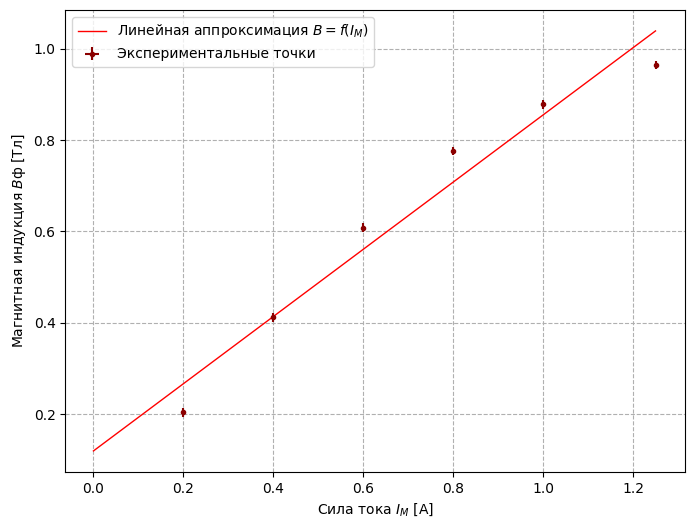

In [66]:
Current_m = np.array([2, 4, 6, 8, 10, 12.5]) * 0.1 #Амперы
MagnInd = np.array([204, 412, 608, 776, 878, 964]) * 0.001 #Теслы

xs = Current_m
ys = MagnInd

sigma_x = np.mean(xs) * 0.5 * 0.01
sigma_y = np.mean(ys)*1.5*0.01

k, b, sigma_k, sigma_b = MNK(xs, ys)

plt.figure(figsize=(8,6), dpi=100) # размер графика
plt.ylabel("Магнитная индукция $B$ф [Тл]") # подписи к осям
plt.xlabel("Сила тока $I_M$ [А]")
plt.grid(True, linestyle="--") # сетка
#plt.axis([0,0.25,0,1.3]) # масштабы осей
x = np.array([0., abs(xs[-1])]) # две точки аппроксимирующей прямой

#В одну сторону
plt.plot(x, k * x + b, "-r",linewidth=1, label="Линейная аппроксимация $B = f(I_M)$", color = 'red') # аппроксимация
plt.errorbar(xs, ys, xerr=sigma_x, yerr=sigma_y, fmt="ok", label="Экспериментальные точки", ms=3, color = 'darkred') # точки с погрешностями

print("Случайная погрешность для коэффициента: ", sigma_k)
eps_K = np.sqrt((sigma_k/k)**2 + (1.5*0.01)**2 + (0.5*0.01)**2)
print("Полная относительная погрешность коэффициента: ", eps_K)

plt.legend() # легенда

#### Переводной коэффициент (Сила тока * K -> Индукция)

In [52]:
K = k
print(K)

0.7350027700831032


## Зависимость ЭДС Холла $\varepsilon_x$ от магнитной индукции $B$

6
eps_k(0) =  0.08475473343311962
eps_k(1) =  0.0864089726452774
eps_k(2) =  0.057345424038196445
eps_k(3) =  0.06608103606149215
eps_k(4) =  0.06800400842031953
eps_k(5) =  0.08028649526950507
[3.12923991e-07 4.85412142e-07 7.87992006e-07 1.02887227e-06
 1.30692226e-06 1.56488341e-06]
Полная относительная погрешность коэффициентов:  0.12689218095117377


/tmp/ipykernel_6032/2932987986.py:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, k * x + b, "-r",linewidth=1, label=f'Аппроксимация, {Current_mod[i]} А', color = colors[i]) # аппроксимация
/tmp/ipykernel_6032/2932987986.py:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok" (-> color='k'). The keyword argument will take precedence.
  plt.errorbar(xs, ys, xerr=sigma_x, yerr=sigma_y, fmt="ok", label="Экспериментальные точки", ms=3, color = colors_d[i]) # точки с погрешностями


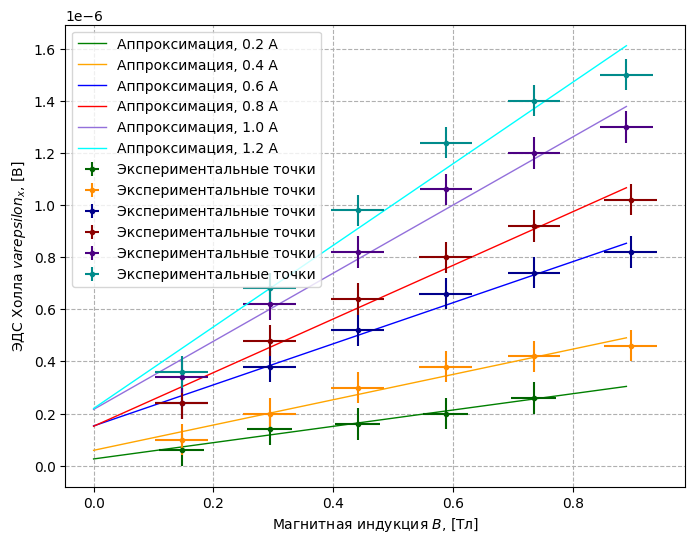

In [72]:
Current_mod = np.array([0.2, 0.4, 0.6, 0.8, 1.0, 1.2]) #Амперы
U0 = np.array([13, 8, 1, -3, -10, -14, 28]) * 0.02 * 10**(-6) #Вольты
U24 = [(np.array([16, 20, 21, 23, 26]) * 0.02 * 10**(-6)) - U0[0], (np.array([13, 18, 23, 27, 29, 31])* 0.02 * 10**(-6)) - U0[1],
        (np.array([13, 20, 27, 34, 38, 42]) * 0.02 * 10**(-6)) - U0[2], (np.array([9, 21, 29, 37, 43, 48]) * 0.02 * 10**(-6)) - U0[3],
          (np.array([7, 21, 31, 43, 50, 55]) * 0.02 * 10**(-6)) - U0[4], (np.array([4, 20, 35, 48, 56, 61]) * 0.02 * 10**(-6)) - U0[5],
            (np.array([36, 45, 54, 59, 63, 66]) * 0.04 * 10**(-6)) - U0[6]] #Вольты
Current_mag = [np.array([0.2, 0.4, 0.6, 0.8, 1.0]), np.array([0.2, 0.4, 0.6, 0.8, 1.0, 1.22]), 
                       np.array([0.2, 0.4, 0.6, 0.8, 1.0, 1.22]), np.array([0.2, 0.4, 0.6, 0.8, 1.0, 1.22]), 
                       np.array([0.2, 0.4, 0.6, 0.8, 1.0, 1.21]), np.array([0.2, 0.4, 0.6, 0.8, 1.0, 1.21])] #Амперы

#Учет U0 для ЭДС Холла - U0[i]
#...

plt.figure(figsize=(8,6), dpi=100) # размер графика
plt.ylabel("ЭДС Холла $varepsilon_x$, [В]") # подписи к осям
plt.xlabel("Магнитная индукция $B$, [Тл]")
plt.grid(True, linestyle="--") # сетка
#plt.axis([0,0.25,0,1.3]) # масштабы осей
x = np.array([0., abs(xs[-1])]) # две точки аппроксимирующей прямой

colors_d = ['darkgreen', 'darkorange', 'darkblue', 'darkred', 'indigo', 'darkcyan']
colors = ['green', 'orange', 'blue', 'red', 'mediumpurple', 'cyan']
print(len(Current_mag))

Koefs = []


for i in range(len(Current_mag)):
    xs = Current_mag[i] * K
    ys = U24[i]

    sigma_x = np.mean(xs) * (0.05 * 0.01 + eps_K)
    sigma_y = 0.06 * 10**(-6) #Систематическая погрешность = 1.5 мкВ * 4.0 * 1/100 (диапазон * класс точности)

    k, b, sigma_k, sigma_b = MNK(xs, ys)
    Koefs.append(k)
    print(f'eps_k({i}) = ', sigma_k/k)
    #В одну сторону
    plt.plot(x, k * x + b, "-r",linewidth=1, label=f'Аппроксимация, {Current_mod[i]} А', color = colors[i]) # аппроксимация
    plt.errorbar(xs, ys, xerr=sigma_x, yerr=sigma_y, fmt="ok", label="Экспериментальные точки", ms=3, color = colors_d[i]) # точки с погрешностями

Koefs = np.array(Koefs)
print(Koefs)

max_eps_k = 0.085
eps_Koefs = np.sqrt(max_eps_k**2 + (0.04)**2 + (eps_K + 0.05 * 0.01)**2)
print("Полная относительная погрешность коэффициентов: ", eps_Koefs)

plt.legend() # легенда



## Зависимость $\frac{\varepsilon_x h}{B}$ ($=K \cdot h$) от тока $I$ в образце и определение постоянной Холла

### Используемая формула: $U = R_H \cdot \frac{B}{h} \cdot I$, где h - толщина образца

6.403719784274439e-11 0.12918662357765018


/tmp/ipykernel_6032/2069516103.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, k * x + b, "-r",linewidth=1, label=f'Аппроксимация', color = 'blue') # аппроксимация
/tmp/ipykernel_6032/2069516103.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok" (-> color='k'). The keyword argument will take precedence.
  plt.errorbar(xs, ys, xerr=sigma_x, yerr=sigma_y, fmt="ok", label="Экспериментальные точки", ms=3, color = 'black') # точки с погрешностями


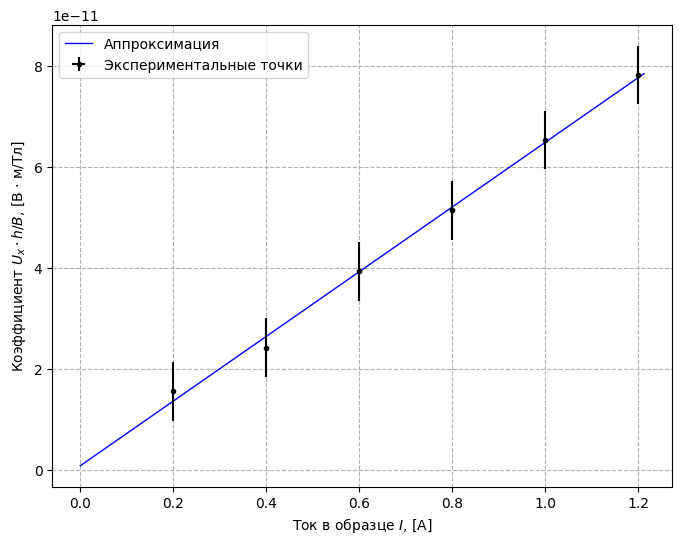

In [84]:
h = 0.05 * 0.001 #Метры

plt.figure(figsize=(8,6), dpi=100) # размер графика
plt.ylabel("Коэффициент $U_x \cdot h / B$, [В $\cdot$ м/Тл]") # подписи к осям
plt.xlabel("Ток в образце $I$, [А]")
plt.grid(True, linestyle="--") # сетка
#plt.axis([0,0.25,0,1.3]) # масштабы осей
x = np.array([0., abs(xs[-1])*1.01]) # две точки аппроксимирующей прямой

xs = Current_mod
ys = Koefs * h

sigma_x = 0.5 * 0.01 * np.mean(xs)
sigma_y = eps_Koefs * np.mean(ys)


k, b, sigma_k, sigma_b = MNK(xs, ys)
#В одну сторону
plt.plot(x, k * x + b, "-r",linewidth=1, label=f'Аппроксимация', color = 'blue') # аппроксимация
plt.errorbar(xs, ys, xerr=sigma_x, yerr=sigma_y, fmt="ok", label="Экспериментальные точки", ms=3, color = 'black') # точки с погрешностями

RH = k

full_accuracy = np.sqrt((0.5*0.01)**2 + eps_Koefs**2 + (sigma_k/k)**2)

print(RH, full_accuracy)

plt.legend() # легенда

Величина постоянной Холла: $R_x \simeq -(0.64 \pm 0.08) \cdot 10^{-10}$ м3/Кл

Реальное значение: $\sim -0.55 \cdot 10^{-10}$ м3/Кл 